In [27]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import itertools

plt.style.use('./informes.mplstyle')



In [49]:
corrientes = [0.2,0.4,0.6,0.8,1]

t   =   []
v   =   []
tf  =   [] #Termocupla Fria
tc  =   [] #Termocupla Caliente
delta_t =   []

for i in range(len(corrientes)):
    df = pd.read_csv(f'Mediciones/Clase 3/celda_temp_fija_I={corrientes[i]}.csv')
    t.append(df['Tiempo [s]'].values)
    v.append(df['Tension generador [V]'].values)
    tf_temp =   df['Tensión termocupla fria [V]'].values
    tc_temp =   df['Tensión termocupla caliente [V]'].values
    tf_temp = tf_temp*1e3 #Pasa el valor a mV
    tc_temp = tc_temp*1e3
    tf.append(tf_temp*22.63 + 28.07) #Pasa el valor a temperatura [C]
    tc.append(tc_temp*22.81 + 27.90)
    delta_t.append((tc[i] - tf[i]))
    

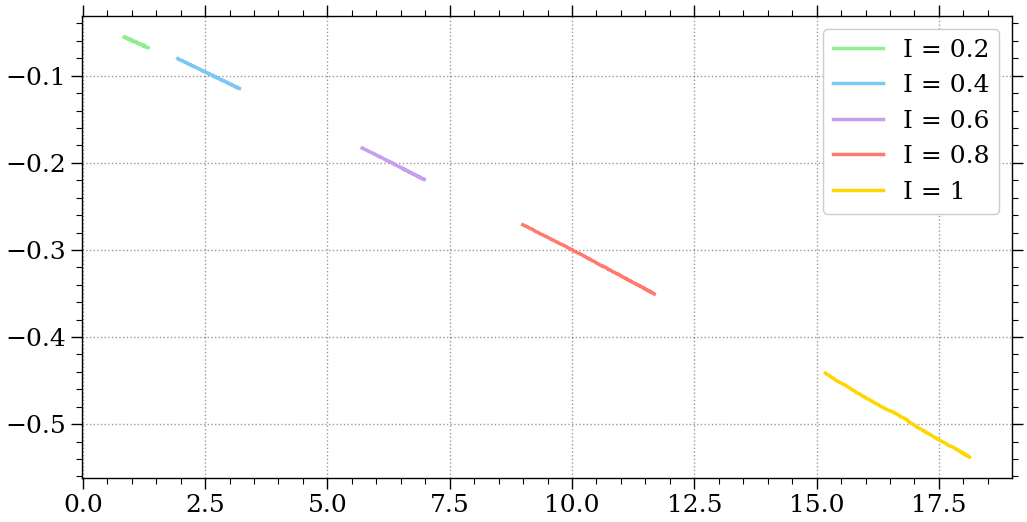

In [45]:
fig,ax = plt.subplots()
for i in range(len(corrientes)):
    ax.plot(delta_t[i],v[i],label = f'I = {corrientes[i]}')
ax.legend()

m = -0.0277; b = -0.0276


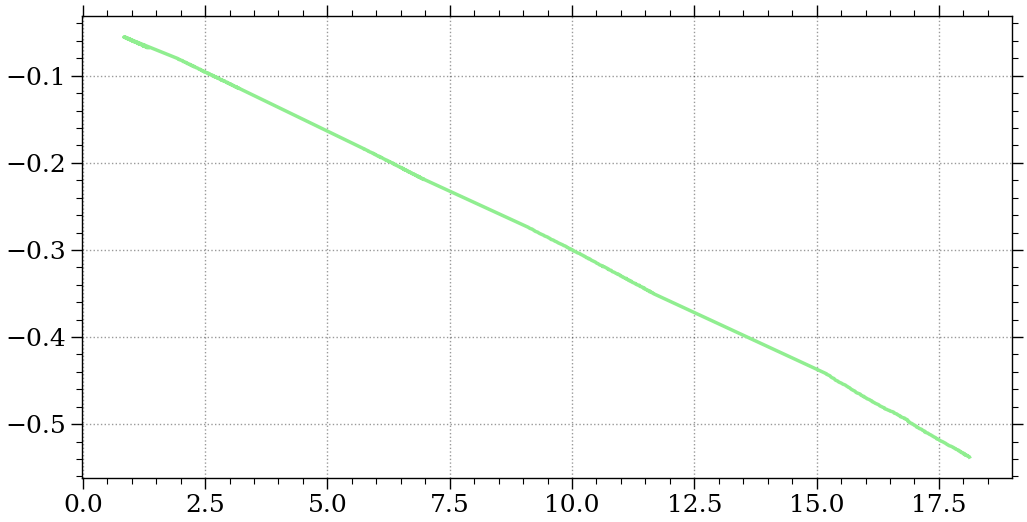

In [67]:
def lineal(T,m,b):
    return m*T +b
delta_t_concatenated = np.concatenate(delta_t)
v_concatenated = np.concatenate(v)

fig, ax = plt.subplots()
ax.plot(delta_t_concatenated,v_concatenated)
popt,pcov = curve_fit(lineal,delta_t_concatenated,v_concatenated)

print(f'm = {popt[0]:.4f}; b = {popt[1]:.4f}')
